In [85]:
import xarray as xr
import rasterio as rio
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, gdal_array
from skimage import data, filters
from scipy.interpolate import interpn
import os

In [109]:
igram_date = '20200108_20200213'
work_dir = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12'
speckle_fn = f'{work_dir}/work/merged/interferograms/{igram_date}/veloc_unwrapped_aoi'
unwrapped_fn = f'{work_dir}/work/merged/interferograms/{igram_date}/filt_fine_aoi_withest.unw'
wrapped_fn = f'{work_dir}/work/merged/interferograms/{igram_date}/filt_fine_aoi.int'
cor_fn = f'{work_dir}/work/merged/interferograms/{igram_date}/filt_fine_aoi.cor'

In [110]:
wrapped_ds = gdal.Open(wrapped_fn, gdal.GA_ReadOnly)
wrapped = wrapped_ds.GetRasterBand(1).ReadAsArray()

cor_ds = gdal.Open(cor_fn, gdal.GA_ReadOnly)
cor = cor_ds.GetRasterBand(1).ReadAsArray()

unwrapped_ds = gdal.Open(unwrapped_fn, gdal.GA_ReadOnly)
unwrapped = unwrapped_ds.GetRasterBand(1).ReadAsArray()

speckle_ds = gdal.Open(speckle_fn, gdal.GA_ReadOnly)
speckle = speckle_ds.GetRasterBand(1).ReadAsArray()

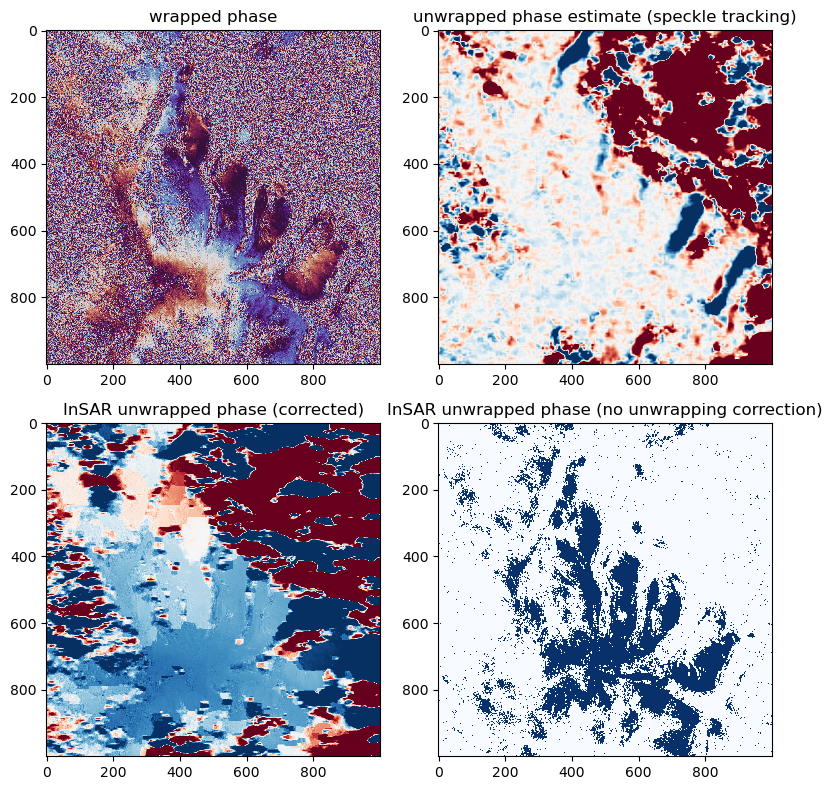

In [111]:
f, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(np.flip(np.angle(wrapped), 0), cmap='twilight', interpolation='none')
ax[0, 0].set_title('wrapped phase')
ax[0, 1].imshow(np.flip(speckle, 0), cmap='RdBu_r', vmin=-50, vmax=50, interpolation='none')
ax[0, 1].set_title('unwrapped phase estimate (speckle tracking)')
ax[1, 0].imshow(np.flip(unwrapped, 0), cmap='RdBu_r', vmin=-25, vmax=25, interpolation='none')
ax[1, 0].set_title('InSAR unwrapped phase (corrected)')
ax[1, 1].imshow(np.flip(cor, 0), cmap='Blues', vmin=0.5, vmax=0.50001, interpolation='none')
ax[1, 1].set_title('InSAR unwrapped phase (no unwrapping correction)')
f.tight_layout()

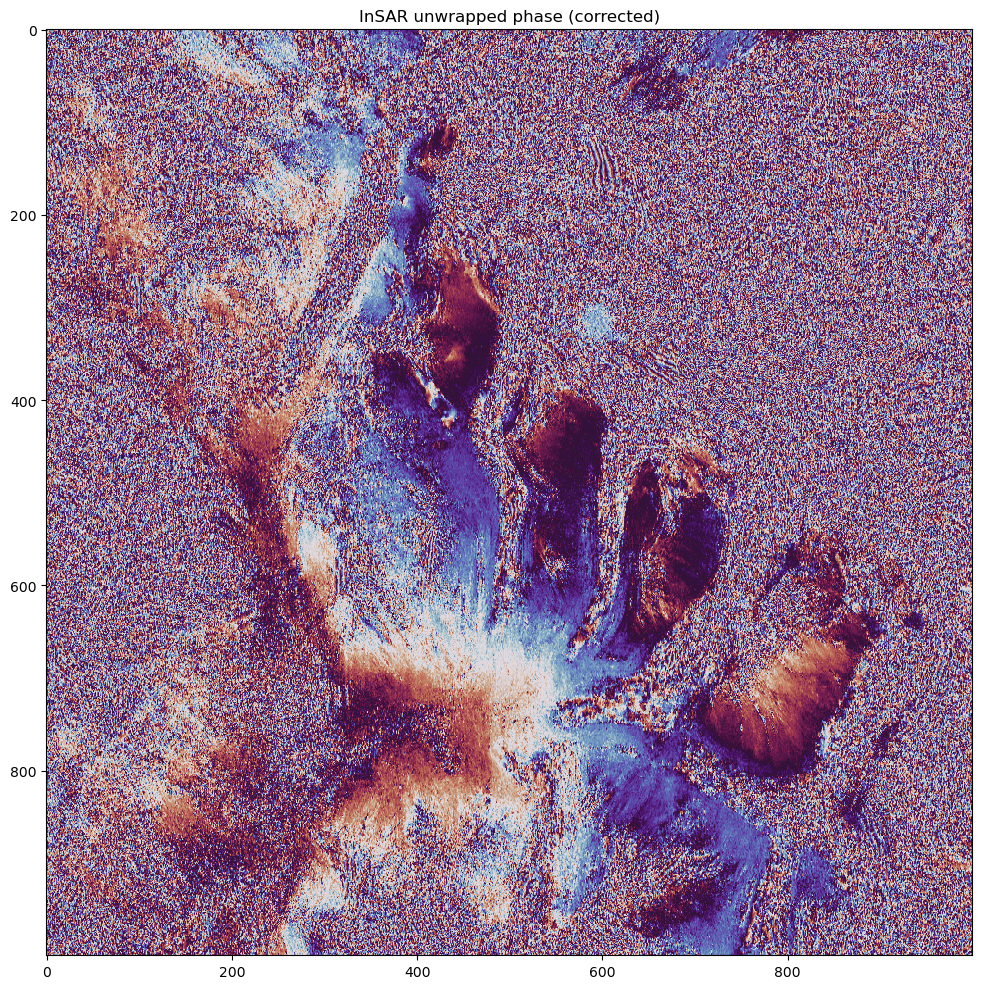

In [112]:
f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.flip(np.angle(wrapped), 0), cmap='twilight', interpolation='none')
ax.set_title('InSAR unwrapped phase (corrected)')
f.tight_layout()

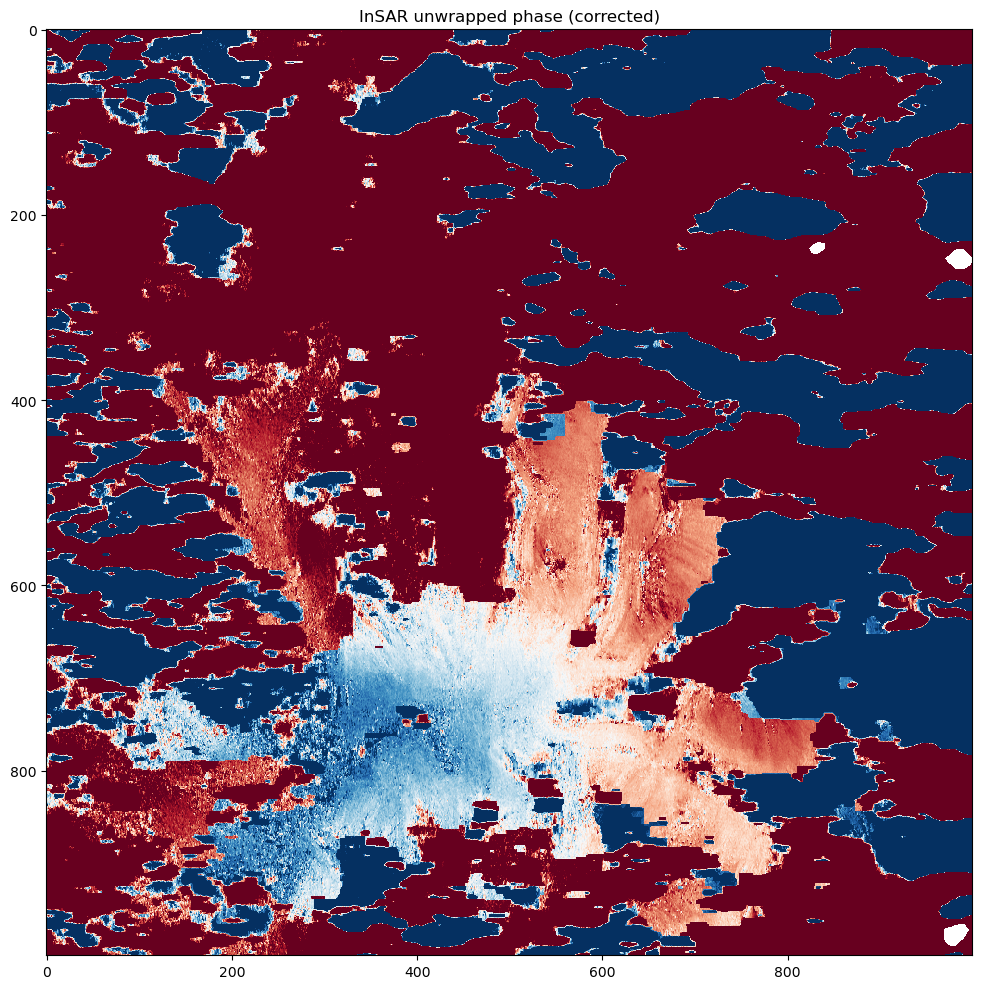

In [116]:
f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.flip(np.where(np.abs(speckle)<1000, unwrapped+15, np.nan), 0), cmap='RdBu_r', vmin=-5, vmax=5, interpolation='none')
ax.set_title('InSAR unwrapped phase (corrected)')
f.tight_layout()

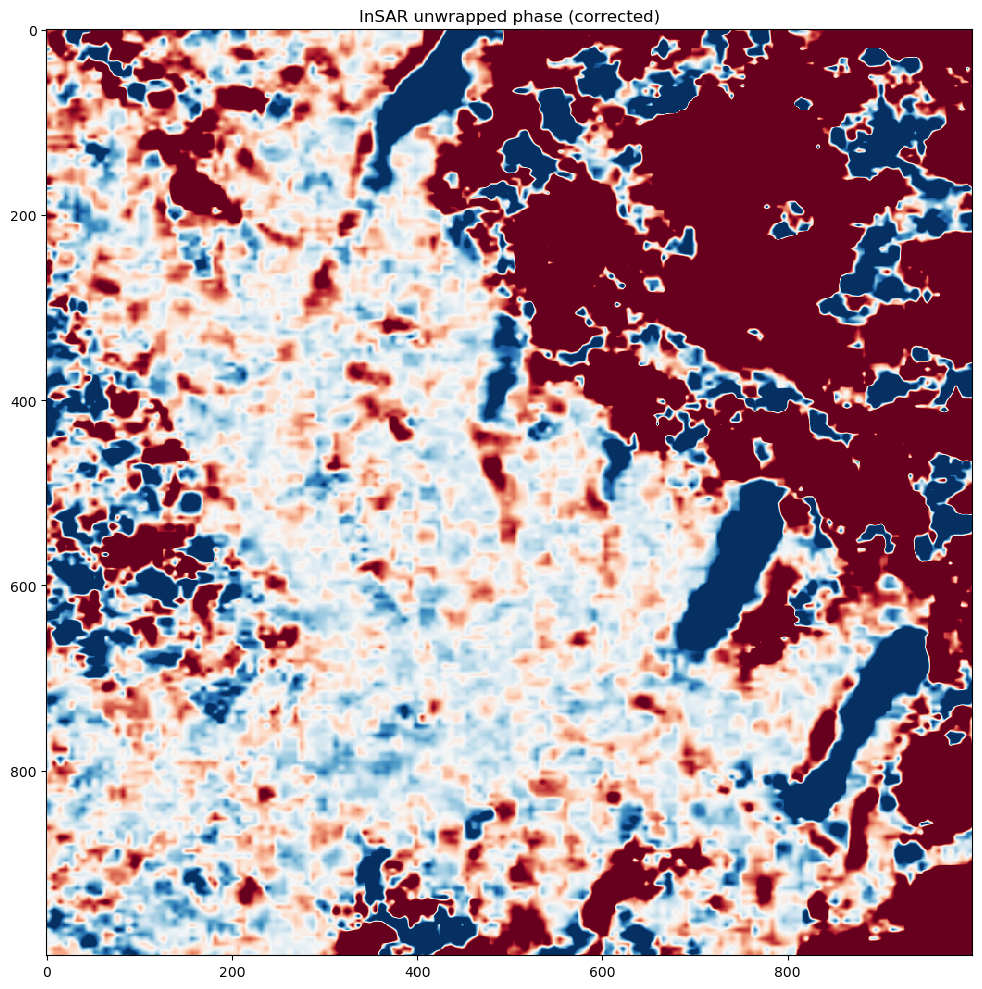

In [114]:
f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.flip(speckle, 0), cmap='RdBu_r', vmin=-25, vmax=25, interpolation='none')
ax.set_title('InSAR unwrapped phase (corrected)')
f.tight_layout()